tensorflow求解多元线性回归
案例来自：
神经网络与深度学习——TensorFlow2.0实战
牟琦、李占利、张昭昭
http://www.icourse163.org/learn/XUST-1206363802?tid=1206674203#/learn/announce

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("tf.__version__",tf.__version__)

tf.__version__ 2.1.0


In [2]:
x1=np.array([137.97, 104.50, 100.00, 124.32, 79.20, 99.00, 124.00, 114.00,
106.69, 138.05, 53.75, 46.91, 68.0,63.02,81.26,86.21],dtype=np.float32)
x2=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2, 2],dtype=np.float32)
y=np.array([145.00, 110.00, 93.00, 116.00, 65.32, 104.00, 118.00, 91.00,
62.00, 133.00, 51.00, 45.00, 78.50, 69.65, 75.69, 95.30],dtype=np.float32)

In [3]:
x1=(x1-x1.min())/(x1.max()-x1.min())
x2=(x2-x2.min())/(x2.max()-x2.min())

In [4]:
x0=np.ones(16,dtype=np.float32)
X=np.stack((x0,x1,x2),axis=1)
Y=y.reshape(-1,1)
X.dtype,Y.dtype

(dtype('float32'), dtype('float32'))

In [5]:
times=50
display_step=5
lr=0.2

In [6]:
np.random.seed(612)
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)
mse=[]
for i in range(times+1):
    with tf.GradientTape() as tape:
        Y_pred=X@W
        loss=tf.reduce_mean(tf.square(Y-Y_pred))/2
    grad=tape.gradient(loss,W)
    W.assign_sub(lr*grad)
    mse.append(loss)
    if i % display_step == 0:
        print("i",i,"loss",loss.numpy(),"W",W.numpy())
        

i 0 loss 4593.8516 W [[18.289951 ]
 [10.117573 ]
 [10.2189045]]
i 5 loss 184.08627 W [[51.481186]
 [31.149841]
 [29.76898 ]]
i 10 loss 85.480896 W [[55.934433]
 [34.676003]
 [33.124847]]
i 15 loss 82.63779 W [[56.174366]
 [35.551468]
 [34.0021  ]]
i 20 loss 82.08096 W [[55.843117]
 [35.993732]
 [34.451828]]
i 25 loss 81.697296 W [[55.475285]
 [36.338085]
 [34.787376]]
i 30 loss 81.40895 W [[55.14387 ]
 [36.638916]
 [35.062313]]
i 35 loss 81.191086 W [[54.854073]
 [36.908195]
 [35.290592]]
i 40 loss 81.02585 W [[54.601746]
 [37.151035]
 [35.47947 ]]
i 45 loss 80.89995 W [[54.382042]
 [37.371094]
 [35.634476]]
i 50 loss 80.80346 W [[54.190563]
 [37.57141 ]
 [35.760303]]


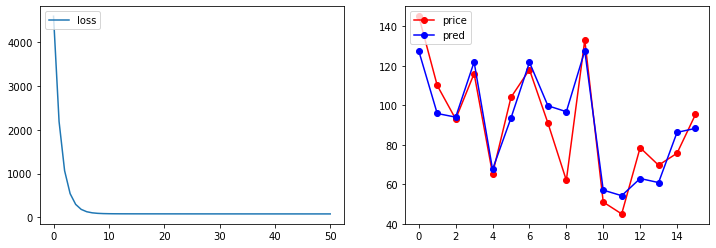

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mse,label="loss")
plt.legend(loc="upper left")
plt.subplot(1,2,2)
plt.plot(Y,label="price",color="red",marker="o")
plt.plot(Y_pred,label="pred",color="blue",marker="o")
plt.legend(loc="upper left")
plt.show()